## Generalization: The goal of machine learning

In [11]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255.0

**Adding white-noise channels or all-zeros channels to MNIST**

In [21]:
train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [12]:
def get_model():
    
    model = Sequential([
        Dense(512, activation="relu"),
        Dense(10, activation="softmax")
    ])
    
    model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [22]:
model = get_model()
history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3525 - accuracy: 0.1141 - val_loss: 2.2912 - val_accuracy: 0.1070
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 2.2647 - accuracy: 0.1528 - val_loss: 2.2241 - val_accuracy: 0.2062
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 2.1843 - accuracy: 0.2129 - val_loss: 2.1516 - val_accuracy: 0.2118
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.0715 - accuracy: 0.2731 - val_loss: 2.0638 - val_accuracy: 0.2631
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 1.9496 - accuracy: 0.3259 - val_loss: 1.9460 - val_accuracy: 0.3191
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 1.8175 - accuracy: 0.3830 - val_loss: 1.8636 - val_accuracy: 0.3492
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 1.6982 - accuracy: 0.4290 - val_loss: 1.7538 - val_accuracy: 0.3905
Epoch 

In [23]:
model = get_model()
history_zeros = model.fit(train_images_with_zeros_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 1.6837 - accuracy: 0.6181 - val_loss: 1.0270 - val_accuracy: 0.7753
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.7641 - accuracy: 0.8181 - val_loss: 0.5549 - val_accuracy: 0.8668
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.5015 - accuracy: 0.8708 - val_loss: 0.4155 - val_accuracy: 0.8917
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.4093 - accuracy: 0.8888 - val_loss: 0.3611 - val_accuracy: 0.9004
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3663 - accuracy: 0.8977 - val_loss: 0.3309 - val_accuracy: 0.9066
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 0.9036 - val_loss: 0.3091 - val_accuracy: 0.9122
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3226 - accuracy: 0.9077 - val_loss: 0.2956 - val_accuracy: 0.9151
Epoch 

**Plotting a validation accuracy comparison**

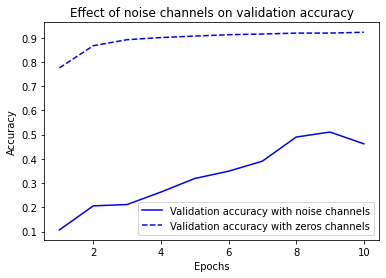

In [24]:
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()